## Email Spam Detection

In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
import string

In [157]:
data=pd.read_csv(r"C:\Users\Amaya Kadam\Desktop\datascience\spam.csv",encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Data Cleaning

In [159]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [160]:
data_clean=data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [161]:
data_clean

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [162]:
data_clean.duplicated().sum()

403

In [163]:
data_clean.drop_duplicates(inplace=True)
data_clean.shape

(5169, 2)

In [164]:
data_clean.isnull().sum()

v1    0
v2    0
dtype: int64

In [165]:
data_clean.columns=['Category','Email']
data_clean.head()

,Category,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [166]:
data_clean.replace({'Category':{'ham':'Not Spam','spam':'Spam'}},inplace=True)
data_clean.head()

,Category,Email
0,Not Spam,"Go until jurong point, crazy.. Available only ..."
1,Not Spam,Ok lar... Joking wif u oni...
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,Not Spam,U dun say so early hor... U c already then say...
4,Not Spam,"Nah I don't think he goes to usf, he lives aro..."


### Exploratory Data Analysis

In [167]:
data_clean['Category'].value_counts()

Category
Not Spam    4516
Spam         653
Name: count, dtype: int64

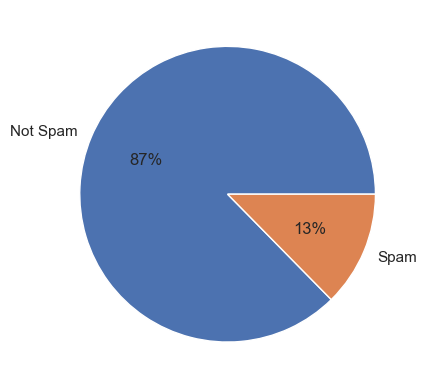

In [168]:
plt.pie(data_clean['Category'].value_counts(), labels=['Not Spam','Spam'],autopct='%1.0f%%')
plt.show()

### Natrual language processing library

In [169]:
import nltk

In [170]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Amaya
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [171]:
data_clean['num_char']=data_clean['Email'].apply(len)
data_clean.head()

,Category,Email,num_char
0,Not Spam,"Go until jurong point, crazy.. Available only ...",111
1,Not Spam,Ok lar... Joking wif u oni...,29
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,Not Spam,U dun say so early hor... U c already then say...,49
4,Not Spam,"Nah I don't think he goes to usf, he lives aro...",61


In [172]:
data_clean['num_word']=data_clean['Email'].apply(lambda x:len(nltk.word_tokenize(x)))
data_clean.head()

,Category,Email,num_char,num_word
0,Not Spam,"Go until jurong point, crazy.. Available only ...",111,24
1,Not Spam,Ok lar... Joking wif u oni...,29,8
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,Not Spam,U dun say so early hor... U c already then say...,49,13
4,Not Spam,"Nah I don't think he goes to usf, he lives aro...",61,15


In [173]:
data_clean['num_sent']=data_clean['Email'].apply(lambda x:len(nltk.sent_tokenize(x)))
data_clean.head()

,Category,Email,num_char,num_word,num_sent
0,Not Spam,"Go until jurong point, crazy.. Available only ...",111,24,2
1,Not Spam,Ok lar... Joking wif u oni...,29,8,2
2,Spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,Not Spam,U dun say so early hor... U c already then say...,49,13,1
4,Not Spam,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [174]:
data_clean[['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [175]:
data_clean[data_clean['Category']=='Not Spam'][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [176]:
data_clean[data_clean['Category']=='Spam'][['num_char','num_word','num_sent']].describe()

,num_char,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


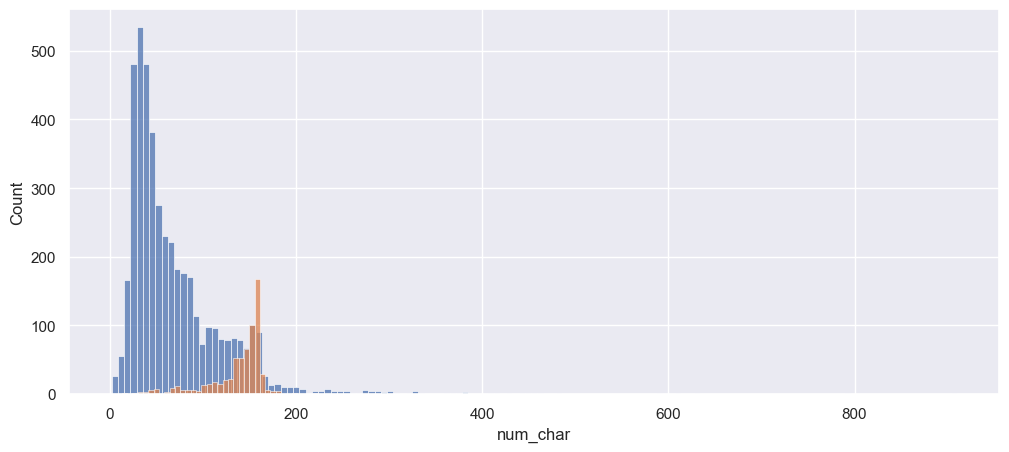

In [177]:
sns.set()
plt.figure(figsize=(12,5))
sns.histplot(data_clean[data_clean['Category']=='Not Spam']['num_char'])
sns.histplot(data_clean[data_clean['Category']=='Spam']['num_char'])
plt.show()

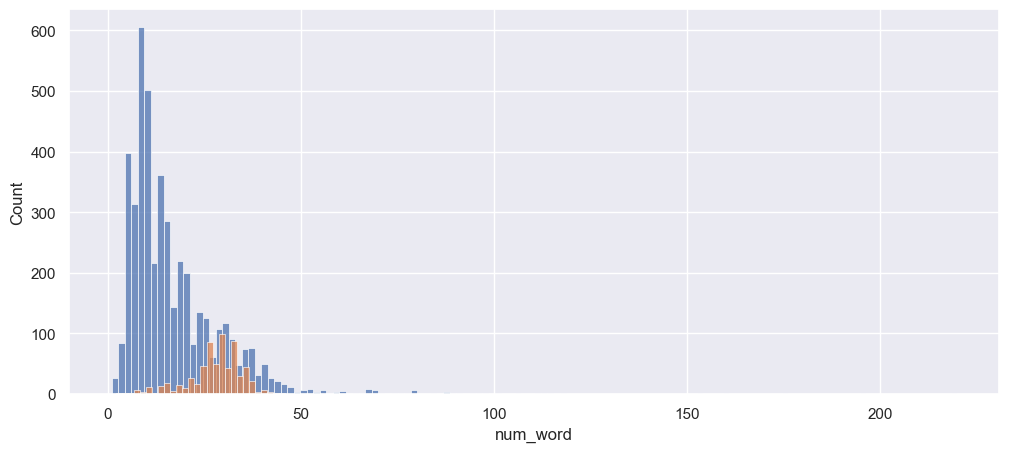

In [178]:
plt.figure(figsize=(12,5))
sns.histplot(data_clean[data_clean['Category']=='Not Spam']['num_word'])
sns.histplot(data_clean[data_clean['Category']=='Spam']['num_word'])
plt.show()

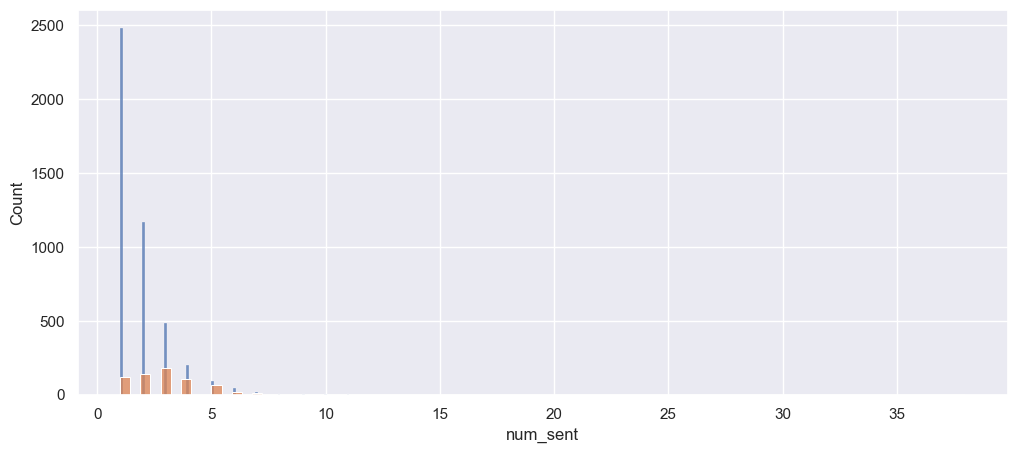

In [179]:
plt.figure(figsize=(12,5))
sns.histplot(data_clean[data_clean['Category']=='Not Spam']['num_sent'])
sns.histplot(data_clean[data_clean['Category']=='Spam']['num_sent'])
plt.show()

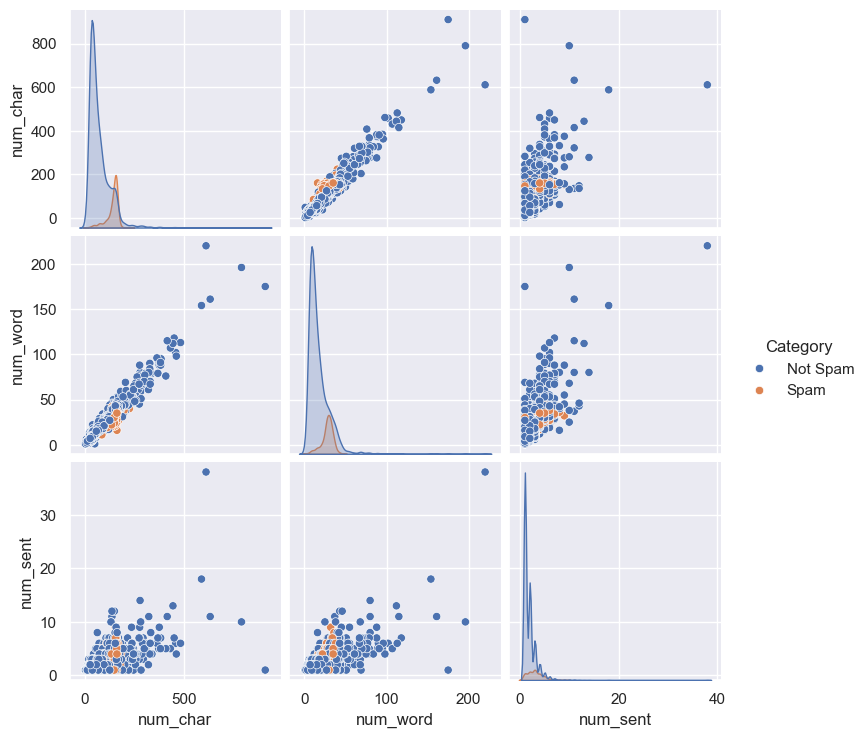

In [180]:
sns.pairplot(data_clean,hue='Category')
plt.show()

In [181]:
data_clean.replace({'Category':{'Not Spam':0,'Spam':1}},inplace=True)
data_clean.head()

,Category,Email,num_char,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [182]:
numeric=data_clean.drop(columns='Email')
numeric.head()

,Category,num_char,num_word,num_sent
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1


<Axes: >

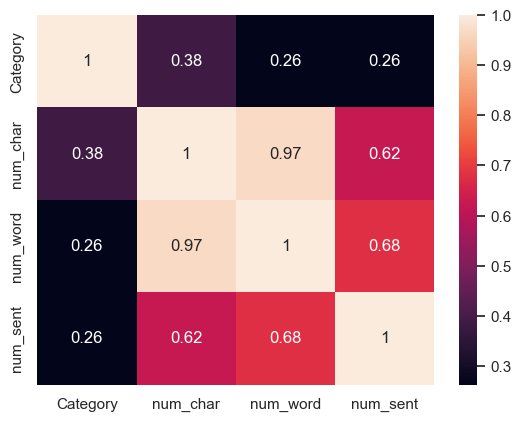

In [183]:
sns.heatmap(numeric.corr(),annot=True)

In [184]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Amaya
[nltk_data]     Kadam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [185]:
ps=PorterStemmer()

### Breaking Down text for vectorization

In [186]:
def text_transform(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y.copy()
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)    
    text=y.copy()
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return ' '.join(y)

In [187]:
data_clean['transformed_text']=data_clean['Email'].apply(text_transform)

In [188]:
data_clean.head()

,Category,Email,num_char,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [189]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

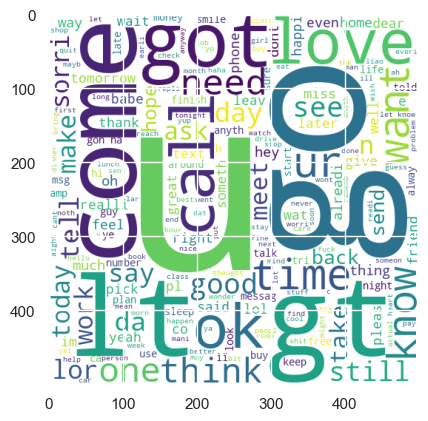

In [190]:
Not_spam_wc=wc.generate(data_clean[data_clean['Category']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(Not_spam_wc)

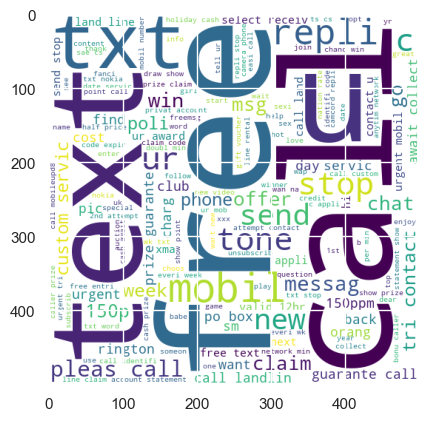

In [191]:
Spam_wc=wc.generate(data_clean[data_clean['Category']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(Spam_wc)

In [192]:
text=[]
for row in data_clean[data_clean['Category']==0]['transformed_text'].tolist():
    for word in row.split():
        text.append(word)    

In [193]:
 len(text)

35404

In [194]:
from collections import Counter
Counter(text).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

In [195]:
Not_Spam=pd.DataFrame(Counter(text).most_common(30))
Not_Spam.columns=['word','count']
Not_Spam.head()

,word,count
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


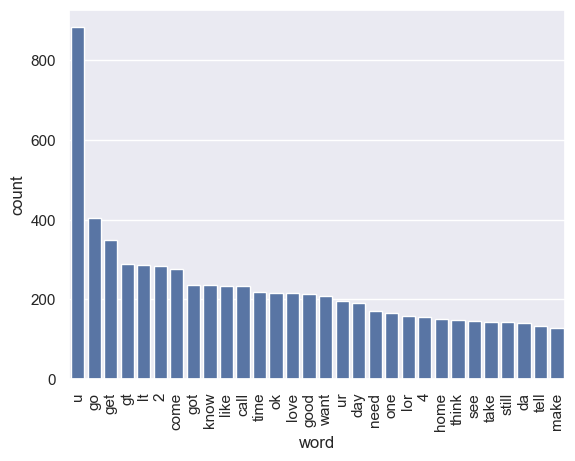

In [196]:
sns.barplot(x='word',y='count',data=Not_Spam)
plt.xticks(rotation='vertical')
plt.show()

In [197]:
text=[]
for row in data_clean[data_clean['Category']==1]['transformed_text'].tolist():
    for word in row.split():
        text.append(word)    

In [198]:
 len(text)

9939

In [199]:
from collections import Counter
Counter(text).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [200]:
Spam=pd.DataFrame(Counter(text).most_common(30))
Spam.columns=['word','count']
Spam.head()

,word,count
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


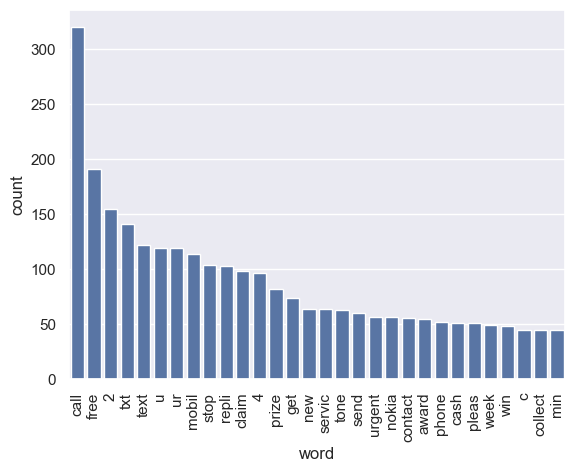

In [201]:
sns.barplot(x='word',y='count',data=Spam)
plt.xticks(rotation='vertical')
plt.show()

### Text Vectorization and Preprocessing

In [202]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

input_values=cv.fit_transform(data_clean['transformed_text]).toarray()
input_values.shape,input_values

In [204]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
input_values=scaler.fit_transform(input_values)

In [205]:
target_values=(data_clean['Category']).values
target_values

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

### Train Test Split

In [206]:
input_train,input_test,output_train,output_test=train_test_split(input_values,target_values,test_size=0.2)

In [207]:
input_train.shape,input_test.shape

((4135, 6708), (1034, 6708))

### Model Training and Testing

In [208]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

In [209]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
rfc=RandomForestClassifier()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)
svm=SVC()

In [210]:
def model(models,input_train,input_test,output_train,output_test):
    models.fit(input_train,output_train)
    pred=models.predict(input_test)
    accuracy=accuracy_score(output_test,pred)*100
    precision=precision_score(output_test,pred)*100
    return accuracy,precision

In [211]:
model(etc,input_train,input_test,output_train,output_test)

(97.1953578336557, 100.0)

In [216]:
model(rfc,input_train,input_test,output_train,output_test)

(97.00193423597679, 100.0)

In [213]:
model(gnb,input_train,input_test,output_train,output_test)

(87.71760154738878, 51.52838427947598)

In [214]:
model(mnb,input_train,input_test,output_train,output_test)

(97.38878143133462, 91.47286821705426)

In [217]:
model(bnb,input_train,input_test,output_train,output_test)

(96.61508704061895, 98.05825242718447)

In [111]:
model(svm,input_train,input_test,output_train,output_test)

(96.5183752417795, 92.1875)

In [225]:
names=[gnb,mnb,bnb,rfc,etc,svm]
a_scores=[]
p_scores=[]

for i in names:
    current_accuracy,current_percision=model(i,input_train,input_test,output_train,output_test)
    a_scores.append(current_accuracy)
    p_scores.append(current_percision)

In [226]:
a_scores,p_scores

([87.71760154738878,
  97.38878143133462,
  96.61508704061895,
  97.09864603481626,
  97.1953578336557,
  95.55125725338492],
 [51.52838427947598,
  91.47286821705426,
  98.05825242718447,
  100.0,
  100.0,
  100.0])

In [227]:
algorithm=['GaussianNB','MultinomialNB','BernoulliNB','RandomForestClassifier','ExtraTreesClassifier','SVM']
all_models=pd.DataFrame({'Algorithm':algorithm,'Accuracy':a_scores,'Precision':p_scores})
all_models

,Algorithm,Accuracy,Precision
0,GaussianNB,87.717602,51.528384
1,MultinomialNB,97.388781,91.472868
2,BernoulliNB,96.615087,98.058252
3,RandomForestClassifier,97.098646,100.000000
4,ExtraTreesClassifier,97.195358,100.000000
5,SVM,95.551257,100.000000


In [122]:
from sklearn.ensemble import VotingClassifier
voting=VotingClassifier(estimators=[('etc',etc),('rfc',rfc),('bnb',bnb)],voting='soft')

In [125]:
voting.fit(input_train,output_train)
pred=voting.predict(input_test)
accuracy_score(output_test,pred)*100,precision_score(output_test,pred)*100

(97.58220502901354, 100.0)